In [2]:
ToDo = '''
Data Smell:- context-independent, data value-based indications of latent data quality issues caused by poor practices that may lead to problems in the future.
We need  to detect data smells in the dataset and suggest the user to fix them.

14 data smells identified in the "Data Smells in Public Datasets" paper, categorized by type:
Redundant value smells:
    red-corr: Correlated features
    red-uid: Unique identifiers
    red-dup: Duplicate examples
Categorical value smells:
    cat-hierarchy: Hierarchy from label encoding
    cat-bin: Binning categorical features→categorical values with large cardinality + one-hot-encoding
Missing value smells:
    miss-null: Missing values
    miss-sp-val: Special missing values
    miss-bin: Binary missing values
String value smells:
    str-num: Numerical feature as string
    str-sanitise: Strings with special characters
    str-human: Strings in human-friendly formats
Miscellaneous value smells:
    misc-unit: Unknown unit of measure
    misc-balance: Imbalanced examples
    misc-sensitive: Presence of sensitive features

Todo: To detect data smells, and suggest the user to fix them
'''
print(ToDo)


Data Smell:- context-independent, data value-based indications of latent data quality issues caused by poor practices that may lead to problems in the future.
We need  to detect data smells in the dataset and suggest the user to fix them.

14 data smells identified in the "Data Smells in Public Datasets" paper, categorized by type:
Redundant value smells:
    red-corr: Correlated features
    red-uid: Unique identifiers
    red-dup: Duplicate examples
Categorical value smells:
    cat-hierarchy: Hierarchy from label encoding
    cat-bin: Binning categorical features→categorical values with large cardinality + one-hot-encoding
Missing value smells:
    miss-null: Missing values
    miss-sp-val: Special missing values
    miss-bin: Binary missing values
String value smells:
    str-num: Numerical feature as string
    str-sanitise: Strings with special characters
    str-human: Strings in human-friendly formats
Miscellaneous value smells:
    misc-unit: Unknown unit of measure
    misc-

In [3]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns 



In [4]:
df = pd.read_csv("data.csv")
df.head()

,b,30.83,0,u,g,w,v,1.25,t,t.1,01,f,g.1,00202,0.1,+
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,00360,0,+


In [5]:
df.columns


Index(['b', '30.83', '0', 'u', 'g', 'w', 'v', '1.25', 't', 't.1', '01', 'f',
       'g.1', '00202', '0.1', '+'],
      dtype='object')

In [6]:
df.dtypes

b         object
30.83     object
0        float64
u         object
g         object
w         object
v         object
1.25     float64
t         object
t.1       object
01         int64
f         object
g.1       object
00202     object
0.1        int64
+         object
dtype: object

Checking presence of Headings

In [7]:
import csv

filename = "data.csv"

# Open the CSV file in read mode
with open(filename, 'r') as csvfile:

  # Create a CSV reader object
  csvreader = csv.reader(csvfile)

  # Get the first row from the CSV file
  first_row = next(csvreader)

  # Check if the first row contains headings or not
  if any(field.strip() != '' for field in first_row) and not any(field.strip().isdigit() for field in first_row):
    print("The CSV file has headings in the first row.")
  else:
    print("The CSV file does not have headings in the first row.")

The CSV file does not have headings in the first row.


1 Missing Values

b        0.0
30.83    0.0
0        0.0
u        0.0
g        0.0
w        0.0
v        0.0
1.25     0.0
t        0.0
t.1      0.0
01       0.0
f        0.0
g.1      0.0
00202    0.0
0.1      0.0
+        0.0
dtype: float64


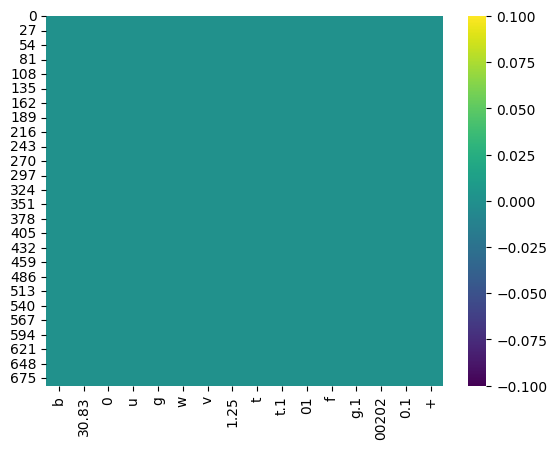

In [8]:

# Visualize missing data using a heatmap
import seaborn as sns
sns.heatmap(df.isnull(), cmap='viridis')

# Calculate percentage of missing values for each column
missing_values = df.isnull().sum() / len(df) * 100
print(missing_values)



2 Outliers

0 has 2.467343976777939% outliers
1.25 has 9.143686502177069% outliers
01 has 11.46589259796807% outliers
0.1 has 16.25544267053701% outliers

The dataset has outliers


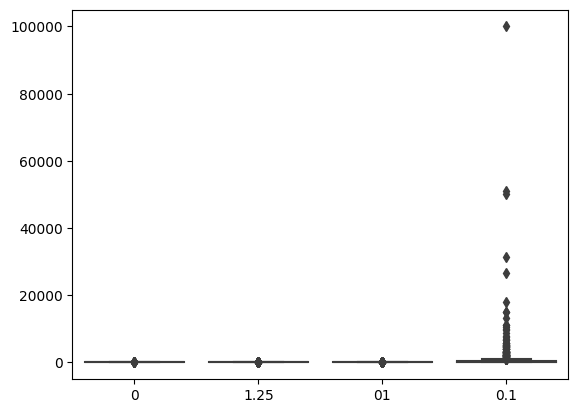

In [9]:
# Plot boxplots for all numerical columns
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
# Visualize boxplots to detect outliers
hasOutliers = False
for col in df.columns:
    # if its numerical column, then print the percentage of outlier
    if df[col].dtype == 'float64' or df[col].dtype == 'int64':
        # Calculate the first and third quartile
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        # Calculate the interquartile range
        IQR = Q3 - Q1
        # Calculate the outlier step
        outlier_step = 1.5 * IQR
        # Calculate the number of outliers
        num_outliers = len(df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)])
        # Calculate the percentage of outliers
        perc_outliers = num_outliers / len(df) * 100
        print(f'{col} has {perc_outliers}% outliers')
        if perc_outliers > 0:
            hasOutliers = True

if hasOutliers:
    print('\nThe dataset has outliers')
else:
    print('\nThe dataset does not have outliers')



In [10]:
# # Visualize histograms to identify anomalous data
# for col in df.columns:
#     plt.hist(df[col], bins=50)
#     plt.title(col)
#     plt.show()

# # Calculate summary statistics to identify anomalous data
# for col in df.columns:
#     mean = df[col].mean()
#     std = df[col].std()
#     anomalies = df[(df[col] < mean-3*std) | (df[col] > mean+3*std)]
#     print(col, len(anomalies))

In [11]:

# Encode categorical variables
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
if len(cat_cols) > 0:
    for col in cat_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        oh = OneHotEncoder(sparse=False)
        oh_cols = pd.DataFrame(oh.fit_transform(df[[col]]))
        oh_cols.columns = [col + '_' + str(i) for i in range(len(oh_cols.columns))]
        df = pd.concat([df, oh_cols], axis=1)
    df.drop(cat_cols, axis=1, inplace=True)

# Remove low variance features
selector = VarianceThreshold()
selector.fit(df)
low_var_cols = df.columns[~selector.get_support()]
df.drop(low_var_cols, axis=1, inplace=True)


NameError: name 'LabelEncoder' is not defined